# <center>AI HACKTHAON 3.0 EGG Analysis to Predict Arousal and Valence</center>

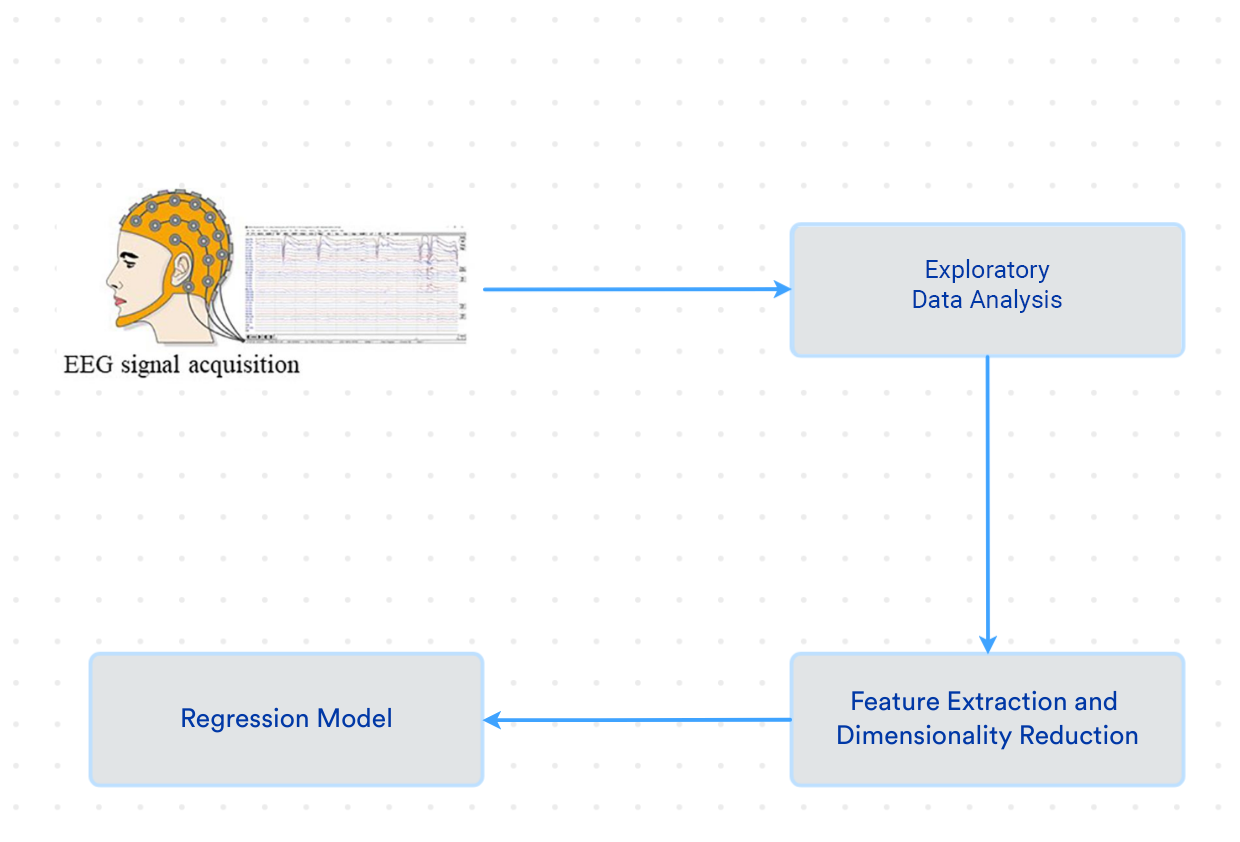

# Exploratory Data Analysis

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,Normalizer
import warnings
warnings.filterwarnings('ignore')

In [70]:
# Loading Train and Test Data
Test = pd.read_csv("Test.csv")
df = pd.read_csv("Train.csv")
df.head()

,ID,channel_0_timestep_0,channel_0_timestep_1,channel_0_timestep_2,channel_0_timestep_3,channel_0_timestep_4,channel_0_timestep_5,channel_0_timestep_6,channel_0_timestep_7,channel_0_timestep_8,...,channel_13_timestep_120,channel_13_timestep_121,channel_13_timestep_122,channel_13_timestep_123,channel_13_timestep_124,channel_13_timestep_125,channel_13_timestep_126,channel_13_timestep_127,valence,arousal
0,1826,0.666593,-0.127720,0.030188,0.872432,0.066428,-0.688929,0.351763,0.962038,1.171841,...,4.268692,4.296591,0.405264,-2.827268,-2.004783,1.276288,2.222049,0.158765,5.0,6.0
1,1959,1.439036,2.939323,4.450541,4.889985,2.808758,0.174926,-0.264143,-0.265241,-2.430413,...,-2.719914,1.040441,0.272578,0.103977,3.468313,6.880353,8.626653,9.982868,1.0,7.0
2,688,-6.873479,2.620711,6.368775,-0.753867,0.504129,8.989532,6.353325,-0.452068,-1.600631,...,0.051793,-5.156834,-18.325062,2.098055,17.815147,0.043855,-3.858117,17.348724,1.0,6.0
3,765,7.343672,-1.043033,3.394326,12.075764,2.094330,-6.726448,-2.849046,-2.859351,-3.247879,...,11.696478,5.142235,-2.881666,-3.570459,-4.366352,-4.056002,-1.489292,-2.761847,2.0,8.0
4,610,8.988179,1.338421,-2.789729,-4.878788,-7.294619,-6.117245,-3.501986,-3.073579,0.061395,...,5.989770,5.809627,4.878367,3.895410,0.987760,0.012008,-0.732414,-3.816425,1.0,7.0


In [204]:
print("Train shape : ",df.shape)

Train shape :  (2898, 1795)


***High Dimensionality ----> Dimensionaluty Reduction and Feature Extraction***

<AxesSubplot:>

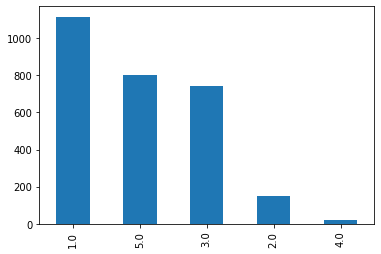

In [214]:
df['valence'].value_counts().plot(kind='bar')

<AxesSubplot:>

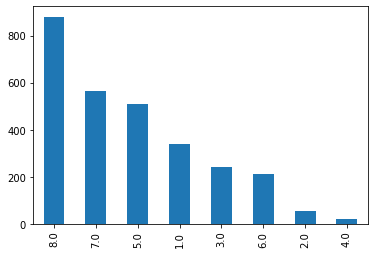

In [215]:
df['arousal'].value_counts().plot(kind='bar')

In [112]:
df = df.drop(['ID','valence','arousal'],axis = 1)

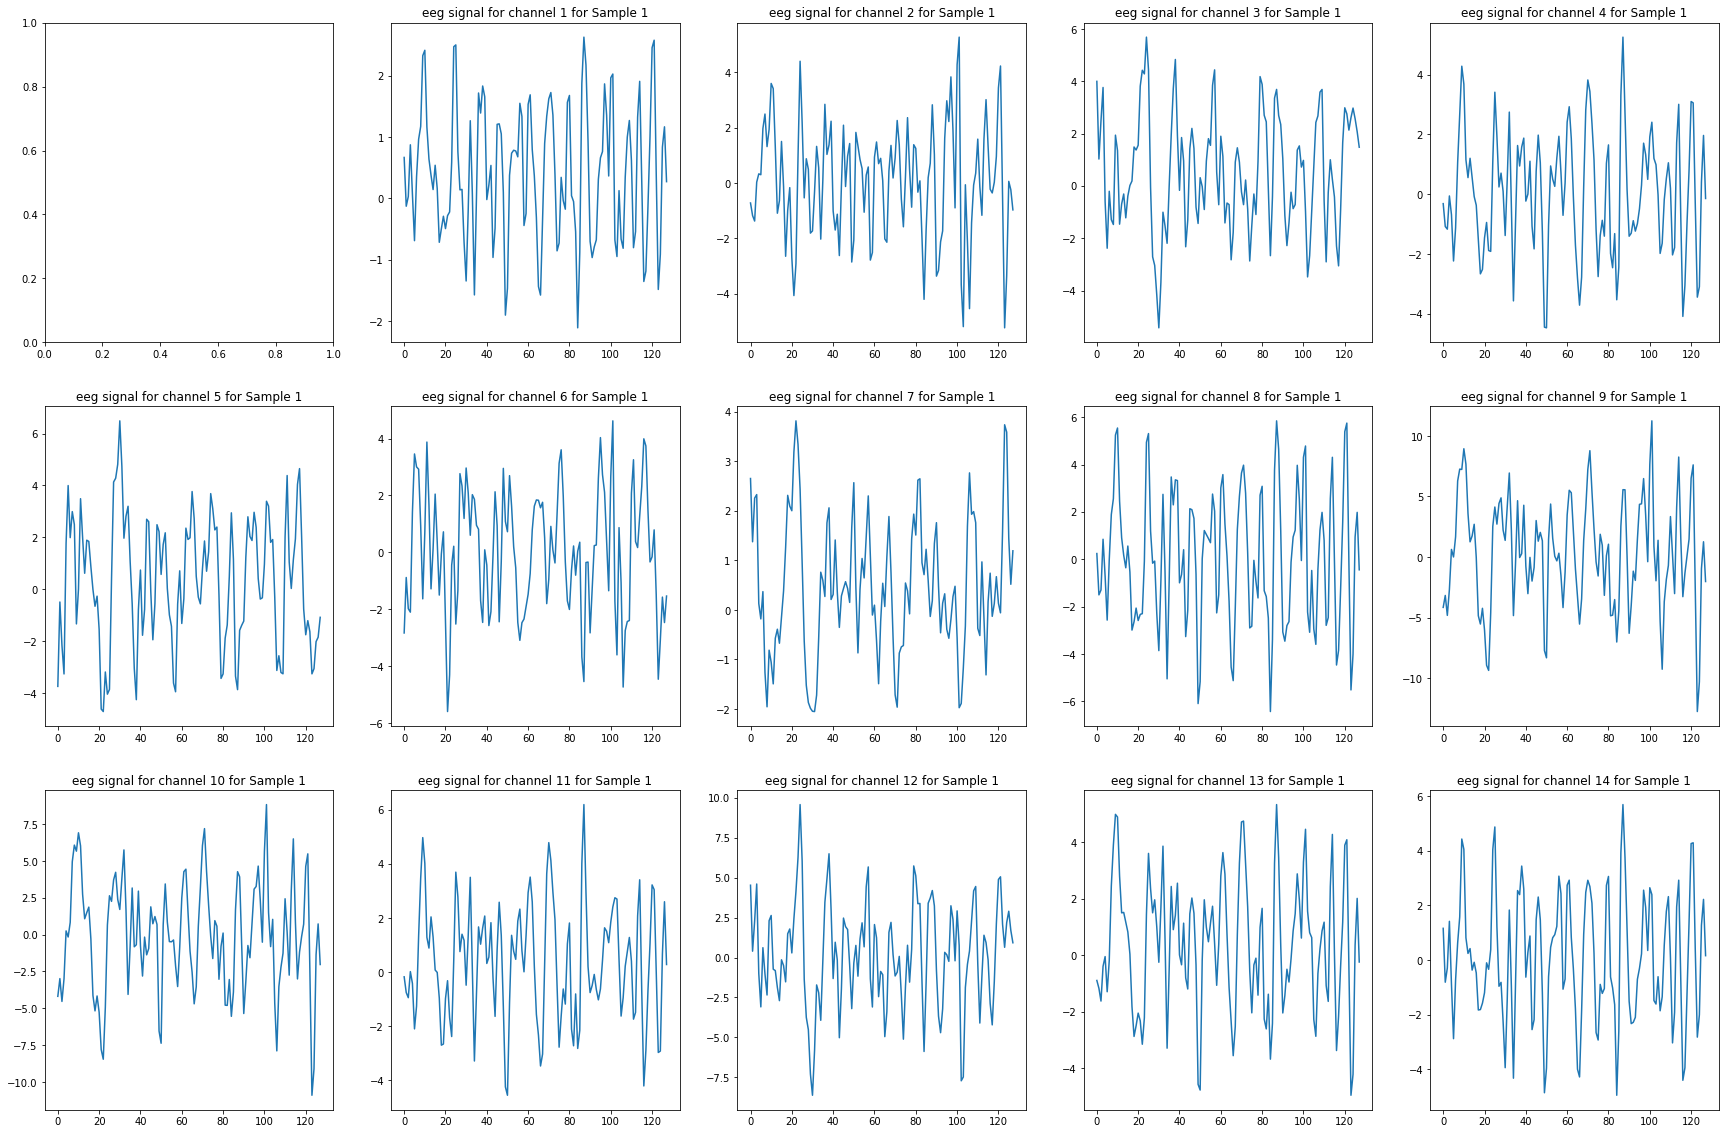

In [149]:
fig, axes = plt.subplots(nrows=3, ncols=5,figsize=(30,20))
k = 0
l = 0
for j in range(1,15) :
    ch=df.iloc[0:1,(j-1)*128:j*128] 
    x_val=[x for x in range(128)]
    ch.columns=x_val
    row = ch.iloc[0]
    if l == 4 :
        k += 1
        l = 0
    else : 
        l +=1
    row.plot(ax=axes[k,l],kind='line',title=f'eeg signal for channel {j} for Sample 1')

# First Approach : Reduce dimensionality by Using Mean, Std, Median, Variance, Min, and Max of each channel

In [3]:
# Loading Train and Test Data
Test = pd.read_csv("Test.csv")
df = pd.read_csv("Train.csv")
df.head()

,ID,channel_0_timestep_0,channel_0_timestep_1,channel_0_timestep_2,channel_0_timestep_3,channel_0_timestep_4,channel_0_timestep_5,channel_0_timestep_6,channel_0_timestep_7,channel_0_timestep_8,...,channel_13_timestep_120,channel_13_timestep_121,channel_13_timestep_122,channel_13_timestep_123,channel_13_timestep_124,channel_13_timestep_125,channel_13_timestep_126,channel_13_timestep_127,valence,arousal
0,1826,0.666593,-0.127720,0.030188,0.872432,0.066428,-0.688929,0.351763,0.962038,1.171841,...,4.268692,4.296591,0.405264,-2.827268,-2.004783,1.276288,2.222049,0.158765,5.0,6.0
1,1959,1.439036,2.939323,4.450541,4.889985,2.808758,0.174926,-0.264143,-0.265241,-2.430413,...,-2.719914,1.040441,0.272578,0.103977,3.468313,6.880353,8.626653,9.982868,1.0,7.0
2,688,-6.873479,2.620711,6.368775,-0.753867,0.504129,8.989532,6.353325,-0.452068,-1.600631,...,0.051793,-5.156834,-18.325062,2.098055,17.815147,0.043855,-3.858117,17.348724,1.0,6.0
3,765,7.343672,-1.043033,3.394326,12.075764,2.094330,-6.726448,-2.849046,-2.859351,-3.247879,...,11.696478,5.142235,-2.881666,-3.570459,-4.366352,-4.056002,-1.489292,-2.761847,2.0,8.0
4,610,8.988179,1.338421,-2.789729,-4.878788,-7.294619,-6.117245,-3.501986,-3.073579,0.061395,...,5.989770,5.809627,4.878367,3.895410,0.987760,0.012008,-0.732414,-3.816425,1.0,7.0


In [4]:
res = False
for v in list(df.isna().sum()):
    if v != 0 :
        print("There is a missing values in " , list(df.isna().sum()).index(v))
        res = True
if res == False:
    print("There is no missing values")

There is no missing values


In [5]:
#Creating Our X and y Matrices (Train and Test)
X = df.drop(['ID','valence','arousal'],axis = 1)
y = df[["valence","arousal"]]
Test_data = Test.drop(['ID'],axis = 1)

In [7]:
#Standard Scaling Train and Test data
scaler = Normalizer()
scaler.fit(X)
X = scaler.transform(X)
Test_data = scaler.transform(Test_data)

In [8]:
X = pd.DataFrame(X)
Test_data = pd.DataFrame(Test_data)

In [ ]:
#Feature Extraction : Using Mean, Meadian, Min, Max, Std, and Variance of each Channel in 128 SPS
import statistics
train_data_new = list()
for i in range(2898):
    data_element = list()
    for j in range(1,15):
        mean = statistics.mean(X.iloc[i,(j-1)*128:j*128])
        median = statistics.median(X.iloc[i,(j-1)*128:j*128])
        maximum = np.max(X.iloc[i,(j-1)*128:j*128])
        minimum = np.min(X.iloc[i,(j-1)*128:j*128])
        std = statistics.stdev(X.iloc[i,(j-1)*128:j*128])
        variance = statistics.variance(X.iloc[i,(j-1)*128:j*128])
        data_element.append([mean, median, maximum, minimum, std, variance])
    train_data_new.append(data_element)
    
train_data_new  = np.array(train_data_new)
train_data_new= train_data_new.reshape(2898,-1)
print("Train Data New Shape : ",train_data_new.shape)

#Test Data now
import statistics
test_data_new = list()
for i in range(1242):
    data_element = list()
    for j in range(1,15):
        mean = statistics.mean(Test_data.iloc[i,(j-1)*128:j*128])
        median = statistics.median(Test_data.iloc[i,(j-1)*128:j*128])
        maximum = np.max(Test_data.iloc[i,(j-1)*128:j*128])
        minimum = np.min(Test_data.iloc[i,(j-1)*128:j*128])
        std = statistics.stdev(Test_data.iloc[i,(j-1)*128:j*128])
        variance = statistics.variance(Test_data.iloc[i,(j-1)*128:j*128])
        data_element.append([mean, median, maximum, minimum, std, variance])
    test_data_new.append(data_element)
    
test_data_new  = np.array(test_data_new)
test_data_new= test_data_new.reshape(1242,-1)
print("Test Data New Shape : ",test_data_new.shape)

***New shape is (length, 14 channels  * 6 generated Values)***

In [342]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor

X_train, X_test, y_train, y_test = train_test_split(
 train_data_new, y, test_size=0.3, random_state=42)
mae_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K, p=1) 
    """
    P default=2
    Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), 
    and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
    """
    wrapper = MultiOutputRegressor(model)

    wrapper.fit(X_train, y_train)  #fit the model
    pred=wrapper.predict(X_test) #make prediction on test set
    error = mean_absolute_error(y_test,pred) #calculate rmse
    mae_val.append(error) #store rmse values
    print('MAE value for k= ' , K , 'is:', error)

MAE value for k=  1 is: 0.9454022988505748
MAE value for k=  2 is: 1.1614942528735632
MAE value for k=  3 is: 1.2224137931034482
MAE value for k=  4 is: 1.2866379310344827
MAE value for k=  5 is: 1.3377011494252875
MAE value for k=  6 is: 1.3454022988505747
MAE value for k=  7 is: 1.3741379310344828
MAE value for k=  8 is: 1.396551724137931
MAE value for k=  9 is: 1.421647509578544
MAE value for k=  10 is: 1.4352873563218391
MAE value for k=  11 is: 1.4526123301985372
MAE value for k=  12 is: 1.4645114942528736
MAE value for k=  13 is: 1.4799292661361627
MAE value for k=  14 is: 1.49072249589491
MAE value for k=  15 is: 1.4939080459770115
MAE value for k=  16 is: 1.500251436781609
MAE value for k=  17 is: 1.5058823529411764
MAE value for k=  18 is: 1.5097381864623243
MAE value for k=  19 is: 1.516606170598911
MAE value for k=  20 is: 1.5262643678160919


In [343]:
model = neighbors.KNeighborsRegressor(n_neighbors = 1, p =1)
wrapper = MultiOutputRegressor(model)

In [344]:
from numpy import mean
from numpy import std
from numpy import absolute
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper,train_data_new, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f' % (mean(n_scores)))

MAE: 0.949


In [79]:
#Training On full data
wrapper.fit(train_data_new,y)

MultiOutputRegressor(estimator=KNeighborsRegressor(n_neighbors=1, p=1))

In [80]:
#Prediction
preds = wrapper.predict(test_data_new)
preds = np.round(preds)
preds[0]

array([5., 5.])

In [81]:
ss = pd.read_csv("SampleSubmission.csv")
ss.head(1)

,ID,valence,arousal
0,2649,0,0


In [82]:
ss["valence"] = preds[:,0]
ss["arousal"] = preds[:,1]
ss.head(1)

,ID,valence,arousal
0,2649,5.0,5.0


In [83]:
ss.to_csv("FirstApproachBest.csv",index= False)

# Second Approch : EEG Frequency Bands

In [322]:
df = pd.read_csv("Train.csv")
Test = pd.read_csv("Test.csv")
print("Train Shape : ",df.shape)
print("Test Shape : ",Test.shape)
df.head()

Train Shape :  (2898, 1795)
Test Shape :  (1242, 1793)


,ID,channel_0_timestep_0,channel_0_timestep_1,channel_0_timestep_2,channel_0_timestep_3,channel_0_timestep_4,channel_0_timestep_5,channel_0_timestep_6,channel_0_timestep_7,channel_0_timestep_8,...,channel_13_timestep_120,channel_13_timestep_121,channel_13_timestep_122,channel_13_timestep_123,channel_13_timestep_124,channel_13_timestep_125,channel_13_timestep_126,channel_13_timestep_127,valence,arousal
0,1826,0.666593,-0.127720,0.030188,0.872432,0.066428,-0.688929,0.351763,0.962038,1.171841,...,4.268692,4.296591,0.405264,-2.827268,-2.004783,1.276288,2.222049,0.158765,5.0,6.0
1,1959,1.439036,2.939323,4.450541,4.889985,2.808758,0.174926,-0.264143,-0.265241,-2.430413,...,-2.719914,1.040441,0.272578,0.103977,3.468313,6.880353,8.626653,9.982868,1.0,7.0
2,688,-6.873479,2.620711,6.368775,-0.753867,0.504129,8.989532,6.353325,-0.452068,-1.600631,...,0.051793,-5.156834,-18.325062,2.098055,17.815147,0.043855,-3.858117,17.348724,1.0,6.0
3,765,7.343672,-1.043033,3.394326,12.075764,2.094330,-6.726448,-2.849046,-2.859351,-3.247879,...,11.696478,5.142235,-2.881666,-3.570459,-4.366352,-4.056002,-1.489292,-2.761847,2.0,8.0
4,610,8.988179,1.338421,-2.789729,-4.878788,-7.294619,-6.117245,-3.501986,-3.073579,0.061395,...,5.989770,5.809627,4.878367,3.895410,0.987760,0.012008,-0.732414,-3.816425,1.0,7.0


In [323]:
#Removing Extra Columns
X = df.drop(['ID','valence','arousal'],axis = 1)
y = df[["valence","arousal"]]

In [324]:
X.shape

(2898, 1792)

In [325]:
#Reshaping Our Data
X = X.values.reshape(2898,14,128)
print("X Train Shape: ",X.shape)
X_test_comp = Test.drop(['ID'],axis = 1)
X_test_comp = X_test_comp.values.reshape(1242,14,128)
print("X Test Shape: ",X_test_comp.shape)

X Train Shape:  (2898, 14, 128)
X Test Shape:  (1242, 14, 128)


***Feature Extraction***

In [326]:
from IPython.display import Image
Image(url= "./Gamma.png", width=700, height=700)

In [327]:
from IPython.display import Image
Image(url= "./Alpha.png", width=600, height=600)

***Ref : http://neurosky.com/2015/05/greek-alphabet-soup-making-sense-of-eeg-bands/***

In [328]:
from scipy.signal import welch
from scipy.integrate import simps
def bandpower(data, sf, band):
    band = np.asarray(band)
    low, high = band
    nperseg = (2 / low) * sf
    """
    Welch’s method  computes an estimate of the power spectral density by dividing the data into overlapping segments, 
    computing a modified periodogram for each segment and averaging the periodograms.
    """
    freqs, psd = welch(data, sf, nperseg=nperseg)
    freq_res = freqs[1] - freqs[0]
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    """
    With the help of scipy.integrate.simps() method, 
    we can get the integration of y(x) using samples along the axis and 
    composite simpson’s rule by using scipy.integrate.simps() method.
    """
    bp = simps(psd[idx_band], dx=freq_res)
    return bp

def get_band_power(people, channel, band):
    bd = (0,0)
    if (band == "delta"):
        bd = (0.5,4)
    if (band == "theta"):
        bd = (4,8)
    elif (band == "alpha"):
        bd = (8,12)
    elif (band == "beta"):
        bd = (12,30)
    elif (band == "gamma"):
        bd = (30,64)
    return bandpower(X[people,channel], 128, bd)

In [329]:
#Calculating eeg_bands for X Train 
#At First we calculated the 5 bands : delta,theta,alpha,beta,gamma 
#However we went with alpha beta and gamma only for The Best results

eeg_band = []
for i in range (len(X)):
    for j in range (len(X[0])):
#         eeg_band.append(get_band_power(i,j,"delta"))
#         eeg_band.append(get_band_power(i,j,"theta"))
#         eeg_band.append(get_band_power(i,j,"alpha"))
        eeg_band.append(get_band_power(i,j,"beta"))
        eeg_band.append(get_band_power(i,j,"gamma"))
        
eeg_band = np.array(eeg_band)
#Reshaping eeg_bands
eeg_band = eeg_band.reshape((2898,28)) # 2×14 2: signals * 14 channels
print(eeg_band.shape)

(2898, 28)


In [330]:
X = eeg_band

In [331]:
# import seaborn as sns
# corr_matrix = pd.DataFrame(X).corr()
# corr_matrix.style.background_gradient(cmap='coolwarm')

In [332]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
stan = preprocessing.StandardScaler()
X=stan.fit_transform(X)
print(X.shape)

(2898, 28)


In [333]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=42)
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K,p=1)
    wrapper = MultiOutputRegressor(model)

    wrapper.fit(X_train, y_train)  #fit the model
    pred=wrapper.predict(X_test) #make prediction on test set
    error = mean_absolute_error(y_test,pred) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('MAE value for k= ' , K , 'is:', error)

MAE value for k=  1 is: 0.8770114942528735
MAE value for k=  2 is: 1.049425287356322
MAE value for k=  3 is: 1.1739463601532565
MAE value for k=  4 is: 1.2357758620689654
MAE value for k=  5 is: 1.2711494252873563
MAE value for k=  6 is: 1.3160919540229887
MAE value for k=  7 is: 1.3420361247947454
MAE value for k=  8 is: 1.363074712643678
MAE value for k=  9 is: 1.389272030651341
MAE value for k=  10 is: 1.4128735632183909
MAE value for k=  11 is: 1.4257575757575758
MAE value for k=  12 is: 1.4420977011494251
MAE value for k=  13 is: 1.4557029177718834
MAE value for k=  14 is: 1.4641625615763547
MAE value for k=  15 is: 1.4739463601532563
MAE value for k=  16 is: 1.4874281609195403
MAE value for k=  17 is: 1.4986139283299527
MAE value for k=  18 is: 1.509259259259259
MAE value for k=  19 is: 1.5209316394434365
MAE value for k=  20 is: 1.529626436781609


In [334]:
model = neighbors.KNeighborsRegressor(n_neighbors = 1, p =1)
wrapper = MultiOutputRegressor(model)

In [335]:
from numpy import mean
from numpy import std
from numpy import absolute
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper,X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f' % (mean(n_scores)))

MAE: 0.802


In [315]:
wrapper.fit(X,y)

MultiOutputRegressor(estimator=KNeighborsRegressor(n_neighbors=1, p=1))

In [317]:
def get_band_power_test(people, channel, band):
    bd = (0,0)
    if (band == "delta"):
        bd = (0.5,4)
    if (band == "theta"):
        bd = (4,8)
    elif (band == "alpha"):
        bd = (8,12)
    elif (band == "beta"):
        bd = (12,30)
    elif (band == "gamma"):
        bd = (30,64)
    return bandpower(X_test_comp[people,channel], 128, bd)


eeg_band_test = []
for i in range (len(X_test_comp)):
    for j in range (len(X_test_comp[0])):
#         eeg_band_test.append(get_band_power_test(i,j,"delta"))
#         eeg_band_test.append(get_band_power_test(i,j,"theta"))
#         eeg_band_test.append(get_band_power_test(i,j,"alpha"))
        eeg_band_test.append(get_band_power_test(i,j,"beta"))
        eeg_band_test.append(get_band_power_test(i,j,"gamma"))
        
#Reshaping eeg_band Test
eeg_band_test = np.array(eeg_band_test)
eeg_band_test = eeg_band_test.reshape((1242,28)) # 5×14
print(eeg_band_test.shape)

(1242, 14)


In [318]:
#StandardScaling Test data
X_test_comp = eeg_band_test
X_test_comp = stan.transform(X_test_comp) 

In [319]:
preds = wrapper.predict(X_test_comp)
preds = np.round(preds)
preds[0]

array([5., 5.])

In [320]:
ss = pd.read_csv("SampleSubmission.csv")
ss.head()
ss["valence"] = preds[:,0]
ss["arousal"] = preds[:,1]
ss

,ID,valence,arousal
0,2649,5.0,5.0
1,1897,3.0,5.0
2,3973,5.0,1.0
3,3038,5.0,2.0
4,494,1.0,8.0
...,...,...,...
1237,2334,5.0,3.0
1238,538,5.0,5.0
1239,1634,1.0,5.0
1240,2812,5.0,1.0


In [321]:
ss.to_csv("SecondBest.csv",index=False)